<a href="https://colab.research.google.com/github/Adh101/TechAxis-Data-Science-with-Python-Notes/blob/main/Day2ofML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression using scikit learn

**Regression**

y=ax+b for Simple Linear Regression

y=a1x1+a2x2+...+anxn+b for multi linear Regression

where,
y= traget values, x= features values,
a,b are coefficients of models
*   Can be used on continuous values such as Houses prices, GDP of a country,Blood Glucose levels
*  Features array need to be 2D array to apply regression




In [ ]:
#Regression using scikit learn

#import
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#load the data set
from google.colab import drive
drive.mount('/content/drive')

sales_df= pd.read_csv('/content/drive/MyDrive/advertising_and_sales_clean.csv')

sales_df=sales_df.drop('influencer',axis=1)
sales_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,tv,radio,social_media,sales
0,16000.0,6566.23,2907.98,54732.76
1,13000.0,9237.76,2409.57,46677.90
2,41000.0,15886.45,2913.41,150177.83
3,83000.0,30020.03,6922.30,298246.34
4,15000.0,8437.41,1406.00,56594.18


In [ ]:
#create feature and target data
X= sales_df["tv"].values.reshape(-1,1)
y= sales_df["sales"].values

#Instantiate model
reg= LinearRegression()

#fit model
reg.fit(X,y)

#predict
predictions= reg.predict(X)
print(predictions)

[ 56851.73298719  46167.19070729 145889.58531972 ... 156574.12759962
 252735.00811874 149451.09941302]


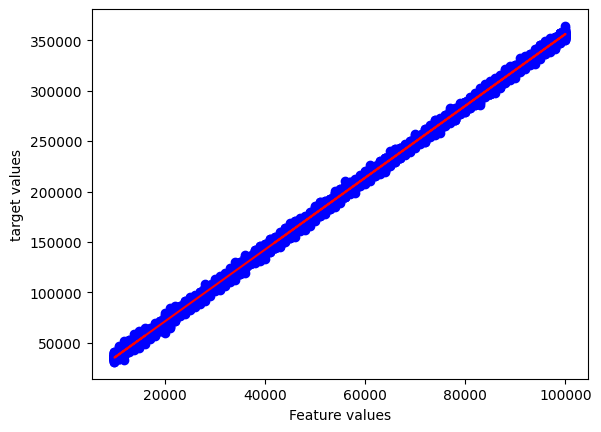

In [ ]:
#plot the model
plt.scatter(X,y , color='blue')
plt.plot(X,predictions, color='red')
plt.xlabel('Feature values')
plt.ylabel('target values')
plt.show()

# How to choose coefficients a and b?



*   Define an error function for any given line and choose line that minimizes error
*   Error function = Loss function = Cost function

**The Loss Function**


*   RSS(Residual Sum of Squares) = sum of the squared of residuals(distance between regression line and data point)
*   RSS is called OLS(Ordinary Least Squared), so minimize the RSS for better model.


*   Linear Regression computes OLS under the hood, but default metric is R-Squared.
*   R-sqaured is variance in target values explained by features.


*   R-squared values ranges 0 to 1,
*   High R-squared, better the model

**MSE and RMSE:**


*   MSE(Mean Squared Error) is mean of RSS
*   RMSE(Root Mean Squared Error)











# Linear Regression using all features:

In [ ]:
#import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#create features and target array
X= sales_df.drop('sales', axis=1).values
y= sales_df['sales'].values

#training and test set
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= 0.3,
                                                random_state=42)

#model
reg= LinearRegression()

#fit the model
reg.fit(X_train,y_train)

#predict
y_pred = reg.predict(X_test)
print('Predictions:{}, Actual Values:{}'.format(y_pred[:2],y_test[:2]))


Predictions:[53176.66154234 70996.19873235], Actual Values:[55261.28 67574.9 ]


In [ ]:
#compute the model performances
from sklearn.metrics import mean_squared_error

 #r_squared
r_squared = reg.score(X_test,y_test)

 #RMSE
rmse= mean_squared_error(y_test, y_pred, squared=False)

print('R^2: {}'.format(r_squared))
print('RMSE: {}'.format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001006


# Cross validation



*   Used to overcome limitations of R-squared being not representative of model's ability to generate to unseen data
*   Datasets in divide into number of folds and each fold is taken as test data iteratively

*   We calculate the metrics in each fold and compute statistics with those metrics to evauate model performance on unseen data







In [ ]:
#import cross fold
from sklearn.model_selection import cross_val_score, KFold

kf= KFold(n_splits=6, shuffle= True, random_state=42)

reg= LinearRegression()

cv_results= cross_val_score(reg, X, y, cv=kf)

print(cv_results)

print(np.mean(cv_results), np.std(cv_results))

[0.99900913 0.99898729 0.99897163 0.99898887 0.99893043 0.99905966]
0.9989911695584723 3.895599514495595e-05


# Regularized Regression



*   Used to avoid overfitting
*   If the coefficients a and b becomes large, it leads to overfitting



**Types of Regularized Regression**

*   Ridge Regression:

    *   Loss function = OLS + alpha * sum of square of coefficients
    *   alpha = hyperparameter we need to choose, alpha=0=OLS leads to overfitting, alpha= very high leads to over fitting


*   Lasso Regression:

    *   Loss function = OLS + sum of absolute values of coefficients
    *   used to select important features ignoring the other non important columns





In [ ]:
#ridge regression
from sklearn.linear_model import Ridge

scores=[]

for alpha in [0.1,1.0,10.0,100.0,1000.0]:
  ridge=Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)

  scores.append(ridge.score(X_test,y_test))
print(scores)
# alpha increses, scores decreases

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764388]


[ 3.56256962 -0.00397037  0.00496392]


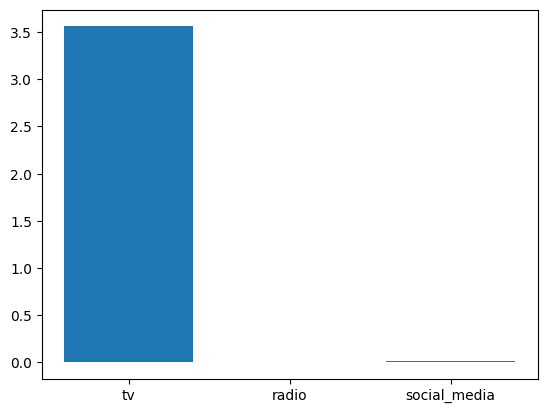

In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

lasso.fit(X,y)

lasso_coef = lasso.fit(X,y).coef_

print(lasso_coef)

sales_columns= sales_df.drop('sales',axis=1).columns

plt.bar(sales_columns,lasso_coef)
plt.show()

It shows tv columns is most imporatnt features for sales value than other features.